# Simple linear regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

## Load the data

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Let's check what's inside this data frame
data.head(20)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [5]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


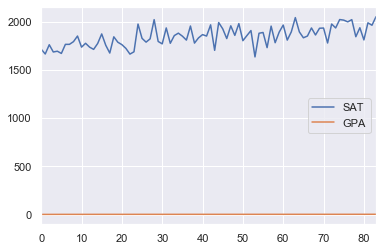

In [8]:
data.plot()

# Create your first regression

## Define the dependent and the independent variables

In [9]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['SAT']

## Explore the data

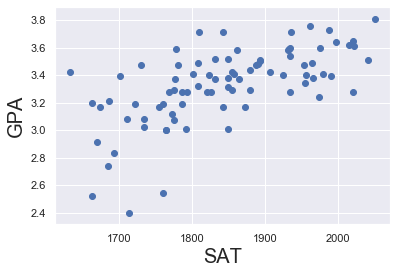

In [11]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# Show the plot
plt.show()

# import matplotlib.pyplot as plt

In [12]:
x1.shape # unidimensional
x = sm.add_constant(x1)
print(x) # 2 variables

print(x.shape)

    const   SAT
0     1.0  1714
1     1.0  1664
2     1.0  1760
3     1.0  1685
4     1.0  1693
..    ...   ...
79    1.0  1936
80    1.0  1810
81    1.0  1987
82    1.0  1962
83    1.0  2050

[84 rows x 2 columns]
(84, 2)


/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Regression itself

In [13]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           7.20e-11
Time:                        06:51:59   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpreting from the above table

## y = b0.1 + b1.x

## b0 = 0.275
## b1 = 0.0017
## i.e. GPA = 0.275 + 0.0017 * SAT
## Plotting regression line using the coefficients generated

                coef	std err	  t	  P>|t|	 [0.025	0.975]
    const	   0.2750	0.409	0.673	0.503	-0.538	1.088
    SAT	     0.0017	0.000	7.487	0.000	 0.001	 0.002
    
## std err show the accuracy of prediction of each variable, lower std err greater the accuracy
## t shows t-statistics, there is a hypothesis involved here.

## In addition to above, the P>|t| column gives the p-value. 
## A p-value < 0.05 means that the variable is significant

## if we see here p-value of SAT is 0.000 which means it is a significant variable in predicting GPA scores, however, the const or y-intercept is not a very significant term


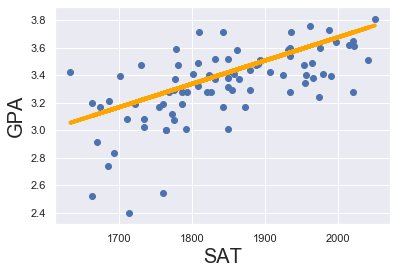

In [14]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [ ]:
## from quiz
0.0017*1850

## Now let's explore the other important part of the statsmodels table
<img style="float: left;" src="1.jpg">
<br>



<br><br><br><br><br>
### Here if you can see the dependent variable is GPA
### Method is Least Squares
### and Model is OLS or Ordinary Least Squares - Most common method in Linear regression, which tries to find a line which minimizes the SSE or Sum of Squared Errors

### It uses gradient descent method to minimize the errors


## Now let's explore the R-Squared part of the statsmodels table


<img style="float: left;" src="2.jpg">
<br><br><br><br>

        R-Squared = SSR / SST (Explained Variability / Total Variability)
        
### It's between 0 to 1. 

###### R-squared = 0 tells your regression explains NONE of the variability
###### R-squared = 1 tells your regression explains entire variability


##### R-squared measures goodness of fit in Regression

## Quiz
Question 1:
SST = 1245, SSR = 945, SSE = 300. What is the R-squared of this regression?

    a) 0.24
    b) 0.52
    c) 0.76
    d) 0.87
    
    

Question 2:
The R-squared is a measure that:

    a) measures how well your data fits the regression line
    b) measures how well your regression fits your data
    c) measures how well your data fits your model
    d) measures how well your model fits your data
  

In [ ]:
#1
945/1245

#2 <br>
The R-squared shows how much of the total variability of the dataset is explained by your regression model. This may be expressed as: how well your model fits your data. It is incorrect to say your regression line fits the data, as the line is the geometrical representation of the regression equation. It also incorrect to say the data fits the model or the regression line, as you are trying to explain the data with a model, not vice versa.


# Move to Multiple-Regression eof